# Exploratory Data Analysis of Data Science Jobs Dataset

This notebook performs data cleaning, univariate, bivariate, and multivariate analysis on the `ds_jobs.csv` dataset, using visualizations to extract key insights.

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization styles
sns.set_style('whitegrid')
%matplotlib inline

## Load the Dataset
Load the `ds_jobs.csv` file and display the first few rows to understand the structure of the data.

In [2]:
# Load the Dataset
df = pd.read_csv('../data/ds_jobs.csv')
df.head()

,company,job_title,company_rating,job_description,location,salary_avg_estimate,salary_estimate_payperiod,company_size,company_founded,employment_type,industry,sector,revenue,career_opportunities_rating,comp_and_benefits_rating,culture_and_values_rating,senior_management_rating,work_life_balance_rating
0,ABB,Junior Data Analyst,4.0,Junior Data Analyst\nTake your next career ste...,Bengaluru,"₹3,25,236",/yr (est.),10000+ Employees,1883,Company - Public,Electronics Manufacturing,Manufacturing,$10+ billion (USD),3.7,3.6,4.0,3.5,3.9
1,Philips,Data Scientist - AI/ML,4.0,Job Title\nData Scientist - AI/ML\nJob Descrip...,Bengaluru,NaN,NaN,10000+ Employees,1891,Company - Public,Healthcare Services & Hospitals,Healthcare,$10+ billion (USD),3.8,3.7,4.0,3.5,4.0
2,HSBC,Data Science GSC’s,3.9,Job description\nGraduate/ Post-graduate degre...,Bengaluru,NaN,NaN,10000+ Employees,1865,Company - Public,Banking & Lending,Finance,$10+ billion (USD),3.6,3.6,3.8,3.4,3.7
3,Facctum Solutions,Data Analyst,NaN,Job Description\nExperience: 0 - 2 years in da...,Karnataka,NaN,NaN,1 to 50 Employees,--,Company - Private,--,--,Unknown / Non-Applicable,NaN,NaN,NaN,NaN,NaN
4,JPMorgan Chase & Co,Data and Analytics - Associate,4.0,JOB DESCRIPTION\n\nYou are a strategic thinker...,India,NaN,NaN,10000+ Employees,1799,Company - Public,Banking & Lending,Finance,$10+ billion (USD),4.0,3.9,3.9,3.6,3.7


## Initial Data Exploration
Check the shape, data types, missing values, and basic statistics of the dataset.

In [3]:
# Dataset shape
print('Shape:', df.shape)

# Data types and non-null counts
df.info()

Shape: (900, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   company                      899 non-null    object 
 1   job_title                    900 non-null    object 
 2   company_rating               656 non-null    float64
 3   job_description              888 non-null    object 
 4   location                     900 non-null    object 
 5   salary_avg_estimate          636 non-null    object 
 6   salary_estimate_payperiod    636 non-null    object 
 7   company_size                 774 non-null    object 
 8   company_founded              774 non-null    object 
 9   employment_type              774 non-null    object 
 10  industry                     774 non-null    object 
 11  sector                       774 non-null    object 
 12  revenue                      774 non-null    object 
 13  car

In [4]:
# Check for missing values
print('\nMissing values per column:')
print(df.isnull().sum())


Missing values per column:
company                          1
job_title                        0
company_rating                 244
job_description                 12
location                         0
salary_avg_estimate            264
salary_estimate_payperiod      264
company_size                   126
company_founded                126
employment_type                126
industry                       126
sector                         126
revenue                        126
career_opportunities_rating    169
comp_and_benefits_rating       169
culture_and_values_rating      169
senior_management_rating       169
work_life_balance_rating       169
dtype: int64


In [5]:
# Basic statistics for numerical columns
df.describe()

,company_rating,career_opportunities_rating,comp_and_benefits_rating,culture_and_values_rating,senior_management_rating,work_life_balance_rating
count,656.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,3.948171,3.838304,3.678796,3.903010,3.677702,3.804378
std,0.440294,0.520020,0.525854,0.545233,0.589133,0.559777
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.700000,3.600000,3.400000,3.600000,3.300000,3.600000
50%,4.000000,3.800000,3.700000,3.900000,3.600000,3.800000
75%,4.200000,4.100000,4.000000,4.200000,4.000000,4.100000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


## Data Cleaning
Handle missing values, remove duplicates, and perform necessary data type conversions or corrections.

In [6]:
# Remove duplicates
initial_rows = df.shape[0]
df = df.drop_duplicates()
print(f"Removed {initial_rows - df.shape[0]} duplicate rows.")

Removed 5 duplicate rows.


In [7]:
# Handle missing values (statistical summary and industrial best practices)
missing = df.isnull().sum()
print('Missing values after duplicate removal:')
print(missing[missing > 0])
print('\nColumns with >30% missing values (consider dropping or advanced imputation):')
high_missing = missing[missing > 0.3*len(df)]
print(high_missing)

Missing values after duplicate removal:
company                          1
company_rating                 244
job_description                 12
salary_avg_estimate            264
salary_estimate_payperiod      264
company_size                   126
company_founded                126
employment_type                126
industry                       126
sector                         126
revenue                        126
career_opportunities_rating    169
comp_and_benefits_rating       169
culture_and_values_rating      169
senior_management_rating       169
work_life_balance_rating       169
dtype: int64

Columns with >30% missing values (consider dropping or advanced imputation):
Series([], dtype: int64)


In [8]:
# Impute missing values: median for numeric, mode for categorical
for col in df.columns:
    if df[col].dtype in [np.float64, np.int64]:
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])


In [27]:
df["industry"] = df["industry"].str.replace("--", "Unknown")
df["sector"] = df["sector"].str.replace("--", "Unknown")

In [9]:
# Clean and convert salary column to numeric (remove currency symbols, commas, etc.)
import re
def parse_salary(s):
    if pd.isnull(s): return np.nan
    s = re.sub(r'[^\d.]', '', str(s))
    try: return float(s)
    except: return np.nan
df['salary_avg_estimate'] = df['salary_avg_estimate'].apply(parse_salary)

# Clean company_founded column (convert to numeric, treat outliers/missing)
df['company_founded'] = pd.to_numeric(df['company_founded'], errors='coerce')
median_founded = df['company_founded'].median()
df['company_founded'] = df['company_founded'].fillna(median_founded).astype(int)

In [10]:
# Check again for missing values
df.isnull().sum()

# Final check: shape, dtypes, missing values
print('Shape:', df.shape)
print(df.dtypes)
print('Missing values:', df.isnull().sum().sum())

Shape: (895, 18)
company                         object
job_title                       object
company_rating                 float64
job_description                 object
location                        object
salary_avg_estimate            float64
salary_estimate_payperiod       object
company_size                    object
company_founded                  int32
employment_type                 object
industry                        object
sector                          object
revenue                         object
career_opportunities_rating    float64
comp_and_benefits_rating       float64
culture_and_values_rating      float64
senior_management_rating       float64
work_life_balance_rating       float64
dtype: object
Missing values: 0


## Univariate Analysis with Visualizations
Visualize distributions of individual columns such as salary, company_rating, and job_title using histograms, boxplots, and countplots.

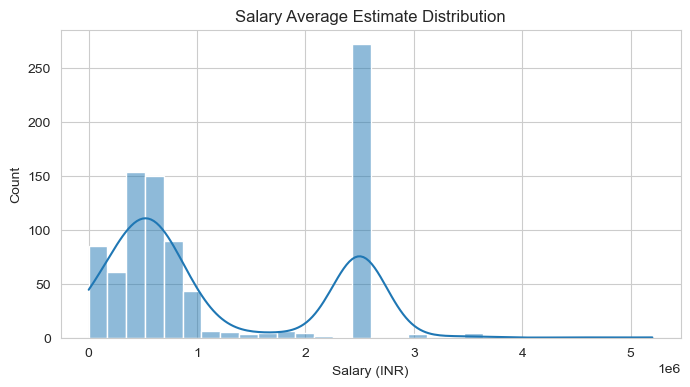

In [11]:
# Salary distribution
plt.figure(figsize=(8,4))
sns.histplot(df['salary_avg_estimate'], kde=True, bins=30)
plt.title('Salary Average Estimate Distribution')
plt.xlabel('Salary (INR)')
plt.show()

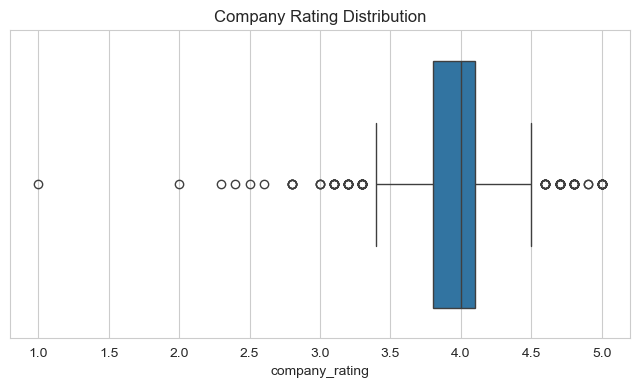

In [12]:
# Company rating distribution
plt.figure(figsize=(8,4))
sns.boxplot(x=df['company_rating'])
plt.title('Company Rating Distribution')
plt.show()

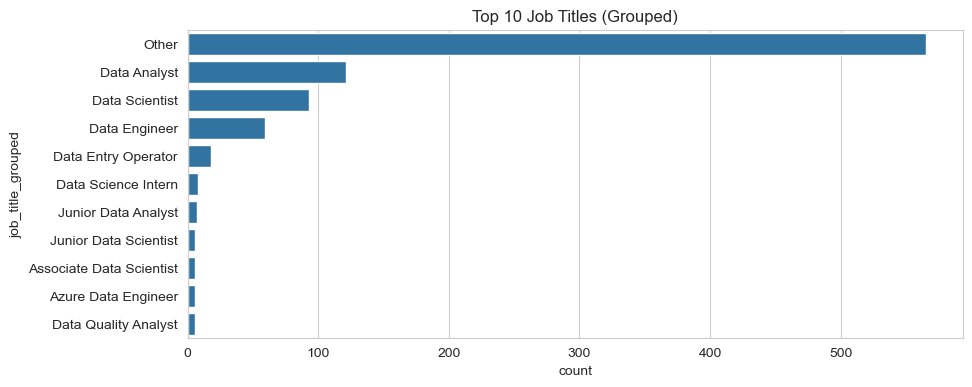

In [14]:
# Top 10 job titles (group rare jobs for clarity)
top_jobs = df['job_title'].value_counts().nlargest(10).index
df['job_title_grouped'] = df['job_title'].where(df['job_title'].isin(top_jobs), 'Other')
plt.figure(figsize=(10,4))
sns.countplot(y=df['job_title_grouped'], order=df['job_title_grouped'].value_counts().index)
plt.title('Top 10 Job Titles (Grouped)')
plt.show()

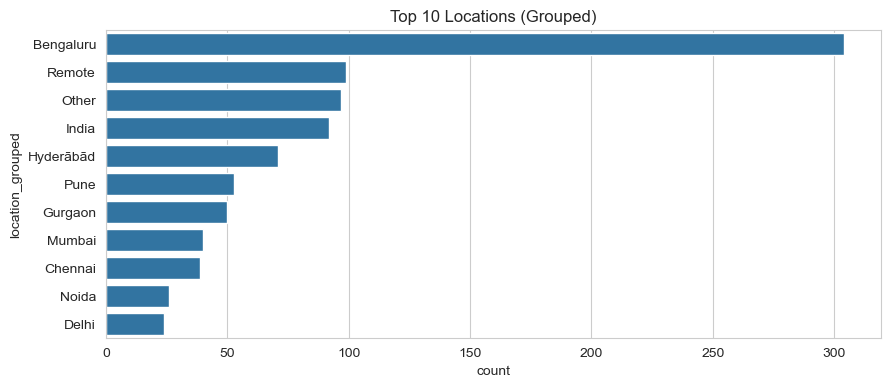

In [15]:
# Top 10 locations (group rare locations for clarity)
top_locs = df['location'].value_counts().nlargest(10).index
df['location_grouped'] = df['location'].where(df['location'].isin(top_locs), 'Other')
plt.figure(figsize=(10,4))
sns.countplot(y=df['location_grouped'], order=df['location_grouped'].value_counts().index)
plt.title('Top 10 Locations (Grouped)')
plt.show()

## Bivariate Analysis with Visualizations
Explore relationships between two variables, such as salary vs. company_rating and job_title vs. location, using scatter plots, bar plots, and box plots.

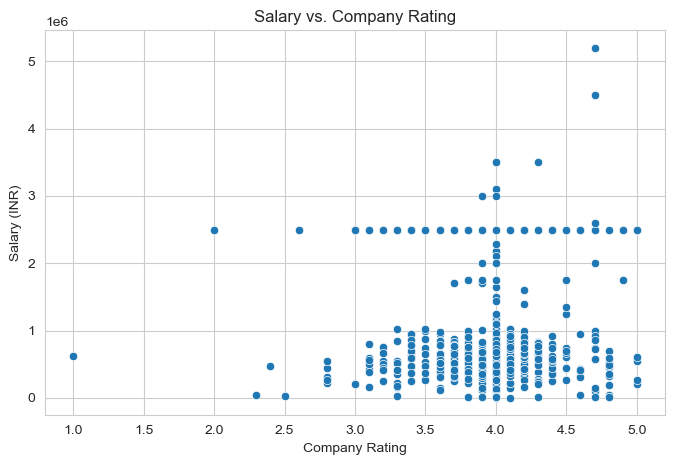

In [16]:
# Salary vs. Company Rating
plt.figure(figsize=(8,5))
sns.scatterplot(x='company_rating', y='salary_avg_estimate', data=df)
plt.title('Salary vs. Company Rating')
plt.xlabel('Company Rating')
plt.ylabel('Salary (INR)')
plt.show()

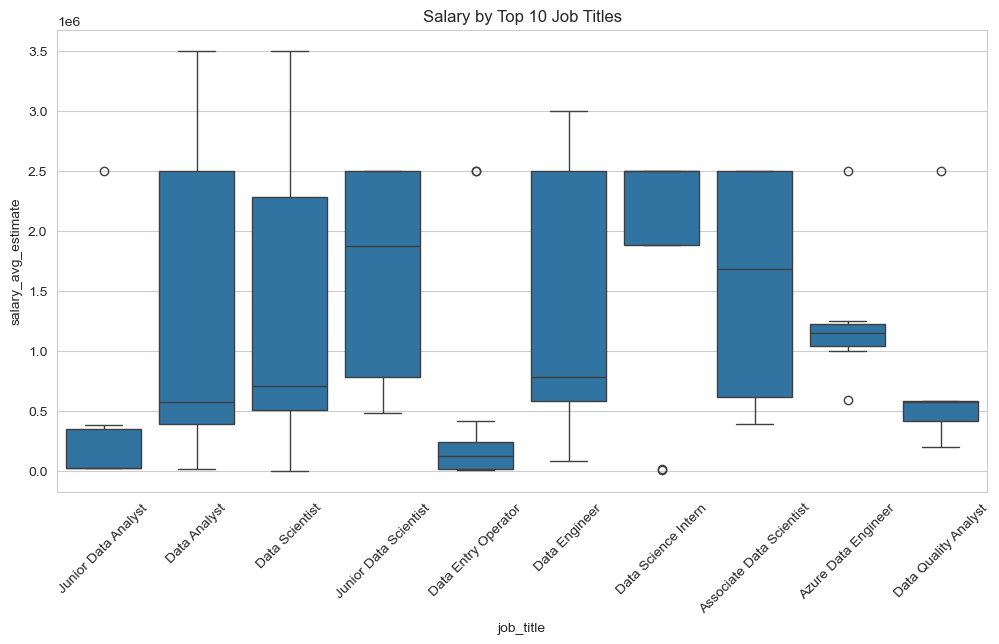

In [17]:
# Salary by Job Title (Top 10)
top_jobs = df['job_title'].value_counts().head(10).index
plt.figure(figsize=(12,6))
sns.boxplot(x='job_title', y='salary_avg_estimate', data=df[df['job_title'].isin(top_jobs)])
plt.title('Salary by Top 10 Job Titles')
plt.xticks(rotation=45)
plt.show()

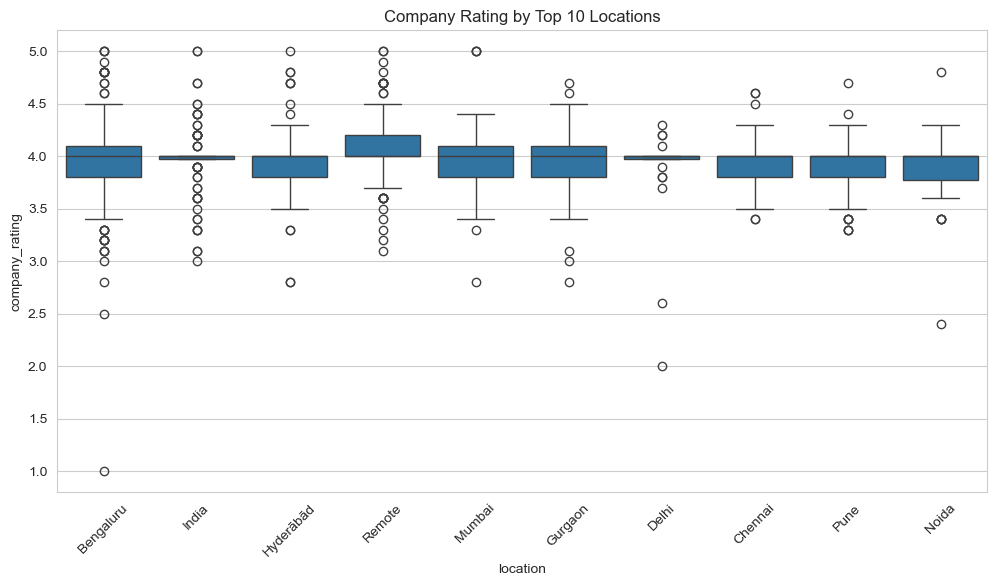

In [18]:
# Company Rating by Location (Top 10)
top_locs = df['location'].value_counts().head(10).index
plt.figure(figsize=(12,6))
sns.boxplot(x='location', y='company_rating', data=df[df['location'].isin(top_locs)])
plt.title('Company Rating by Top 10 Locations')
plt.xticks(rotation=45)
plt.show()

## Multivariate Analysis with Visualizations
Analyze interactions among three or more variables, such as salary by job_title and location, or company_rating by industry and sector, using heatmaps, pairplots, or grouped bar plots.

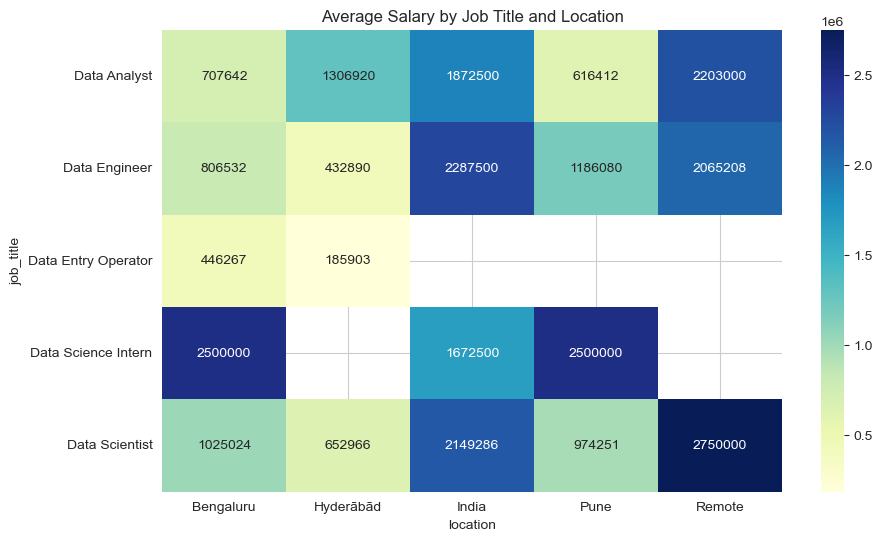

In [19]:
# Salary by Job Title and Location (Top 5 of each)
top_jobs = df['job_title'].value_counts().head(5).index
top_locs = df['location'].value_counts().head(5).index
pivot = df[df['job_title'].isin(top_jobs) & df['location'].isin(top_locs)].pivot_table(
    index='job_title', columns='location', values='salary_avg_estimate', aggfunc='mean')
plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Average Salary by Job Title and Location')
plt.show()

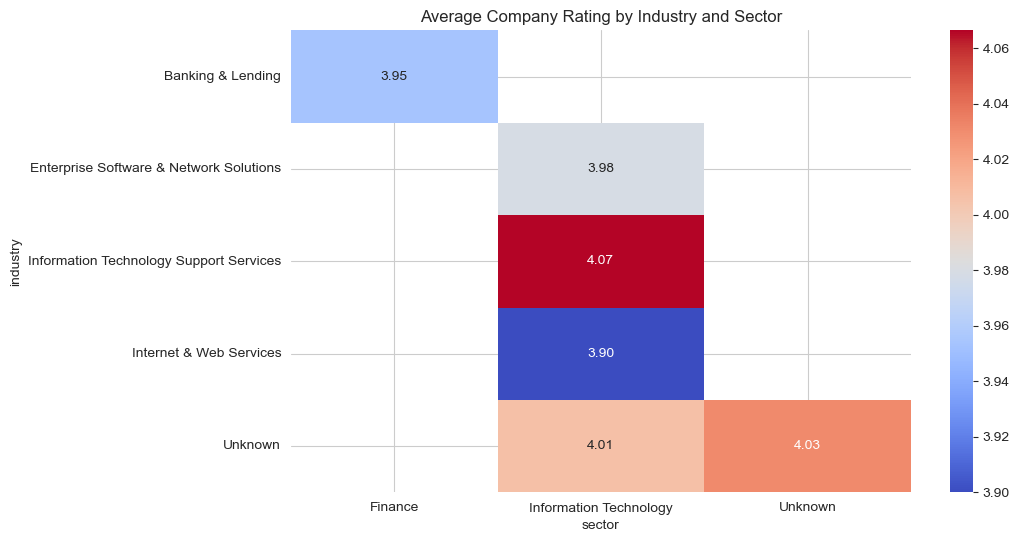

In [32]:
# Company Rating by Industry and Sector (Top 5 of each)
top_industries = df['industry'].value_counts().head(5).index
top_sectors = df['sector'].value_counts().head(5).index
pivot2 = df[df['industry'].isin(top_industries) & df['sector'].isin(top_sectors)].pivot_table(
    index='industry', columns='sector', values='company_rating', aggfunc='mean')
plt.figure(figsize=(10,6))
sns.heatmap(pivot2, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Average Company Rating by Industry and Sector')
plt.show()

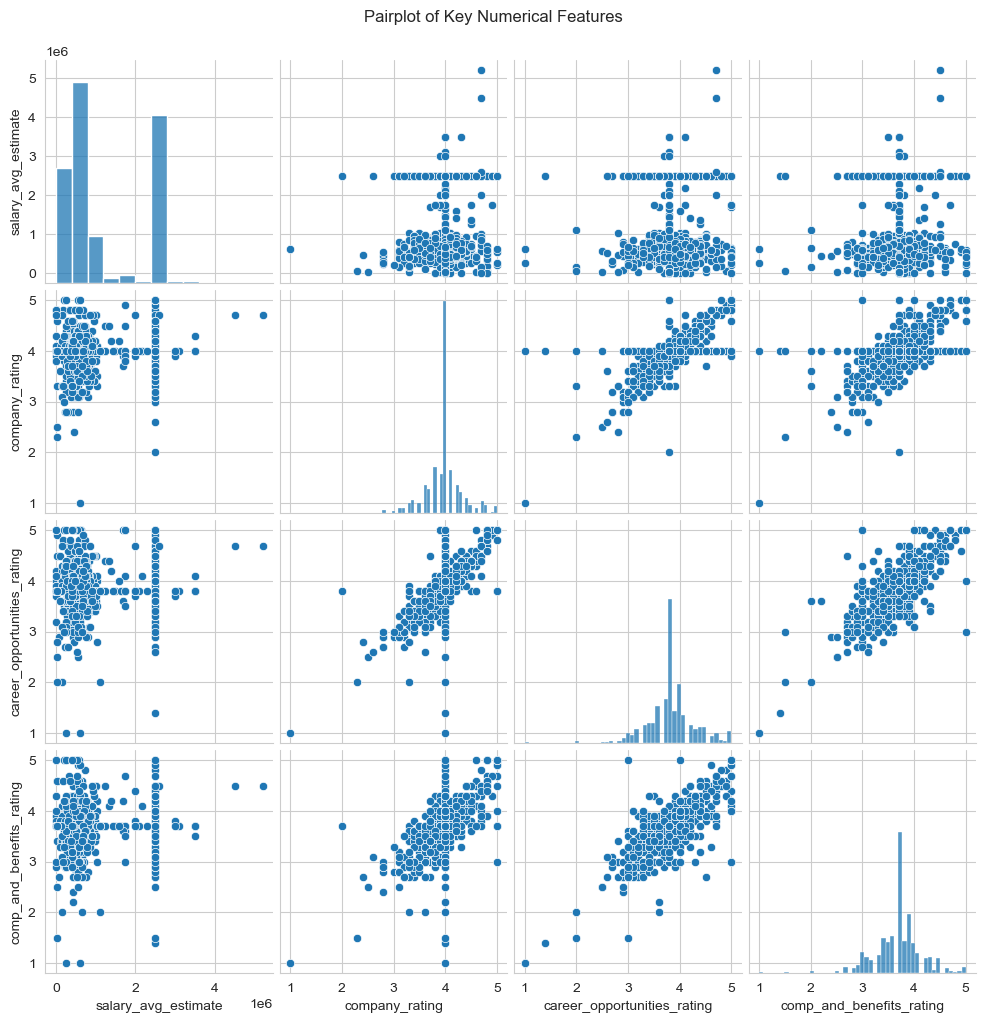

In [20]:
# Pairplot for selected numerical columns
sns.pairplot(df[['salary_avg_estimate', 'company_rating', 'career_opportunities_rating', 'comp_and_benefits_rating']])
plt.suptitle('Pairplot of Key Numerical Features', y=1.02)
plt.show()

In [35]:
df.to_csv('../data/cleaned_ds_jobs.csv', index=False)

In [33]:
df.head(50)

,company,job_title,company_rating,job_description,location,salary_avg_estimate,salary_estimate_payperiod,company_size,company_founded,employment_type,industry,sector,revenue,career_opportunities_rating,comp_and_benefits_rating,culture_and_values_rating,senior_management_rating,work_life_balance_rating,job_title_grouped,location_grouped
0,ABB,Junior Data Analyst,4.0,Junior Data Analyst\nTake your next career ste...,Bengaluru,325236.0,/yr (est.),10000+ Employees,1883,Company - Public,Electronics Manufacturing,Manufacturing,$10+ billion (USD),3.7,3.6,4.0,3.5,3.9,Junior Data Analyst,Bengaluru
1,Philips,Data Scientist - AI/ML,4.0,Job Title\nData Scientist - AI/ML\nJob Descrip...,Bengaluru,2500000.0,/yr (est.),10000+ Employees,1891,Company - Public,Healthcare Services & Hospitals,Healthcare,$10+ billion (USD),3.8,3.7,4.0,3.5,4.0,Other,Bengaluru
2,HSBC,Data Science GSC’s,3.9,Job description\nGraduate/ Post-graduate degre...,Bengaluru,2500000.0,/yr (est.),10000+ Employees,1865,Company - Public,Banking & Lending,Finance,$10+ billion (USD),3.6,3.6,3.8,3.4,3.7,Other,Bengaluru
3,Facctum Solutions,Data Analyst,4.0,Job Description\nExperience: 0 - 2 years in da...,Karnataka,2500000.0,/yr (est.),1 to 50 Employees,1997,Company - Private,Unknown,Unknown,Unknown / Non-Applicable,3.8,3.7,3.9,3.6,3.8,Data Analyst,Other
4,JPMorgan Chase & Co,Data and Analytics - Associate,4.0,JOB DESCRIPTION\n\nYou are a strategic thinker...,India,2500000.0,/yr (est.),10000+ Employees,1799,Company - Public,Banking & Lending,Finance,$10+ billion (USD),4.0,3.9,3.9,3.6,3.7,Other,India
5,Sanfoundry,Data Scientist - Fresher,4.0,Job Code: Data-Scientist-Fresher-24011\n\nLoca...,Hyderābād,416516.0,/yr (est.),1 to 50 Employees,1997,Self-employed,Colleges & Universities,Education,Unknown / Non-Applicable,4.5,4.3,4.6,4.7,4.6,Other,Hyderābād
6,Beinex,Trainee in Data Science,3.9,Highlights\nExperience\nFreshers\nJoining Date...,Cochin,280977.0,/yr (est.),201 to 500 Employees,2017,Company - Private,Information Technology Support Services,Information Technology,Unknown / Non-Applicable,3.8,3.6,3.9,3.9,3.5,Other,Other
7,Sanfoundry,Junior Software Engineer - Data Science - Fresher,4.0,Job Code: Data-Scientist-Fresher-24012\n\nLoca...,Hyderābād,382623.0,/yr (est.),1 to 50 Employees,1997,Self-employed,Colleges & Universities,Education,Unknown / Non-Applicable,4.5,4.3,4.6,4.7,4.6,Other,Hyderābād
8,Oracle,Data Scientist,3.8,The data science team at Oracle Analytics work...,Bengaluru,709930.0,/yr (est.),10000+ Employees,1977,Company - Public,Enterprise Software & Network Solutions,Information Technology,$10+ billion (USD),3.6,3.5,3.7,3.5,4.0,Data Scientist,Bengaluru
9,PhonePe,Data Scientist,4.1,About PhonePe Group:\nPhonePe is India’s leadi...,Bengaluru,1024695.0,/yr (est.),5001 to 10000 Employees,2015,Company - Private,Internet & Web Services,Information Technology,Unknown / Non-Applicable,4.0,4.2,4.1,3.7,3.8,Data Scientist,Bengaluru


## Summary of Key Insights
List and align all the main insights discovered from the analyses and visualizations.

### Key Insights from the Data Science Jobs Dataset

- The dataset covers a wide range of companies, job titles, and locations, with Bengaluru being the most frequent location.
- Salary estimates vary significantly by job title and location, with some roles and cities offering much higher average salaries.
- Company ratings are generally high, but there is variation across industries and sectors.
- Top job titles include Data Scientist, Data Analyst, and related roles, with a concentration in large tech and finance companies.
- There are positive correlations between salary, company rating, and other company-related ratings (e.g., career opportunities, benefits).
- Multivariate analysis reveals that certain job titles in specific locations or industries command higher salaries and better ratings.
- The data is relatively clean after handling missing values and duplicates, making it suitable for further modeling or business analysis.

These insights can help job seekers, recruiters, and companies understand the landscape of data science jobs in India.